In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


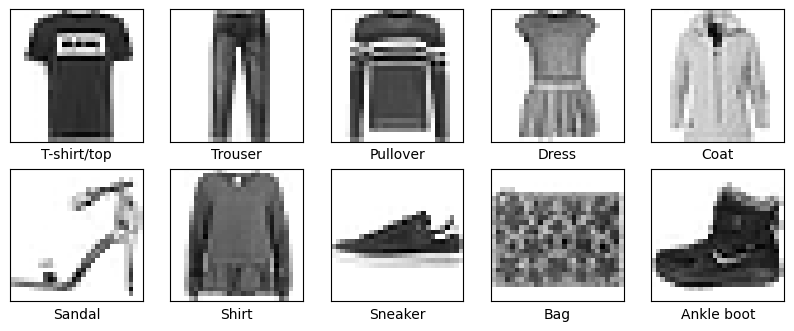

In [4]:
plt.figure(figsize=(10, 10))
for i in range(10):
    # Find the first instance of each class
    class_idx = np.where(train_labels == i)[0][0]
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[class_idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [9]:
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
test_images.shape

(10000, 28, 28, 1)

In [12]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [13]:
from tensorflow.keras import layers , models 


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D (64 , (3 , 3) , activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D (64 , (3 , 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10 , activation='softmax'))

c:\Users\mohamed osama\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,514 (240.29 KB)

 Trainable params: 61,514 (240.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5781 - loss: 1.2145 - val_accuracy: 0.7941 - val_loss: 0.5641
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8149 - loss: 0.5052 - val_accuracy: 0.8339 - val_loss: 0.4595
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8438 - loss: 0.4296 - val_accuracy: 0.8510 - val_loss: 0.4046
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8581 - loss: 0.3848 - val_accuracy: 0.8644 - val_loss: 0.3792
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8663 - loss: 0.3634 - val_accuracy: 0.8652 - val_loss: 0.3739
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8742 - loss: 0.3390 - val_accuracy: 0.8639 - val_loss: 0.3698
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8834 - loss: 0.3226 - val_accuracy: 0.8809 - val_loss: 0.3291
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8844 - loss: 0.3168 - val_accu

In [20]:
test_loss , test_accuracy = model.evaluate(test_images , test_labels)
from sklearn.metrics import confusion_matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8711 - loss: 0.3928


In [18]:

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9), loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8470 - loss: 0.4299 - val_accuracy: 0.8715 - val_loss: 0.3596
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8731 - loss: 0.3481 - val_accuracy: 0.8717 - val_loss: 0.3474
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8845 - loss: 0.3132 - val_accuracy: 0.8706 - val_loss: 0.3598
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8894 - loss: 0.2989 - val_accuracy: 0.8801 - val_loss: 0.3315
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8948 - loss: 0.2890 - val_accuracy: 0.8702 - val_loss: 0.3721
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9025 - loss: 0.2654 - val_accuracy: 0.8812 - val_loss: 0.3345
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9077 - loss: 0.2541 - val_accuracy: 0.8892 - val_loss: 0.3293
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9087 - loss: 0.2418 - val_accu

In [28]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])


In [29]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5891 - loss: 1.2661 - val_accuracy: 0.8123 - val_loss: 0.5152
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8210 - loss: 0.4843 - val_accuracy: 0.8386 - val_loss: 0.4437
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8526 - loss: 0.4126 - val_accuracy: 0.8602 - val_loss: 0.3840
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8670 - loss: 0.3704 - val_accuracy: 0.8717 - val_loss: 0.3549
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8788 - loss: 0.3411 - val_accuracy: 0.8731 - val_loss: 0.3542
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8833 - loss: 0.3241 - val_accuracy: 0.8838 - val_loss: 0.3273
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8872 - loss: 0.3081 - val_accuracy: 0.8857 - val_loss: 0.3176
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8918 - loss: 0.2956 - val_accu

In [30]:
model.compile(optimizer='RMSprop', loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8895 - loss: 0.3016 - val_accuracy: 0.8932 - val_loss: 0.3014
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8991 - loss: 0.2771 - val_accuracy: 0.8876 - val_loss: 0.3184
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9067 - loss: 0.2590 - val_accuracy: 0.8896 - val_loss: 0.3131
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9121 - loss: 0.2425 - val_accuracy: 0.9002 - val_loss: 0.2813
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9185 - loss: 0.2299 - val_accuracy: 0.9045 - val_loss: 0.2751
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9205 - loss: 0.2186 - val_accuracy: 0.9007 - val_loss: 0.2844
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9226 - loss: 0.2126 - val_accuracy: 0.9062 - val_loss: 0.2657
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9310 - loss: 0.1927 - val_accu

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9383 - loss: 0.1661 - val_accuracy: 0.9033 - val_loss: 0.2930
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9467 - loss: 0.1471 - val_accuracy: 0.9053 - val_loss: 0.2840
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9491 - loss: 0.1394 - val_accuracy: 0.8997 - val_loss: 0.3061
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9515 - loss: 0.1340 - val_accuracy: 0.9087 - val_loss: 0.2793
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9561 - loss: 0.1217 - val_accuracy: 0.9087 - val_loss: 0.2889
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9582 - loss: 0.1148 - val_accuracy: 0.9058 - val_loss: 0.2886
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9589 - loss: 0.1130 - val_accuracy: 0.9080 - val_loss: 0.3087
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9624 - loss: 0.1035 - val_accu

In [2]:
from tensorflow.keras import layers, models, regularizers, optimizers

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.02),input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D (64 , (3 , 3),kernel_regularizer=regularizers.l2(0.02) , activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D (64 , (3 , 3),kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10 , activation='softmax'))

c:\Users\mohamed osama\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,642 (240.79 KB)

 Trainable params: 61,578 (240.54 KB)

 Non-trainable params: 64 (256.00 B)

In [47]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [49]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7198 - loss: 0.8225 - val_accuracy: 0.8283 - val_loss: 0.8056
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8492 - loss: 0.4310 - val_accuracy: 0.8608 - val_loss: 0.3942
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8654 - loss: 0.3824 - val_accuracy: 0.8733 - val_loss: 0.3608
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8806 - loss: 0.3442 - val_accuracy: 0.8807 - val_loss: 0.3444
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8903 - loss: 0.3239 - val_accuracy: 0.8631 - val_loss: 0.3993
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8914 - loss: 0.3132 - val_accuracy: 0.8753 - val_loss: 0.3522
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8949 - loss: 0.3033 - val_accuracy: 0.8898 - val_loss: 0.3191
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8971 - loss: 0.2885 - val_acc

In [50]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9), loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [51]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7891 - loss: 0.7064 - val_accuracy: 0.7178 - val_loss: 0.7609
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8322 - loss: 0.4872 - val_accuracy: 0.8533 - val_loss: 0.4391
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8486 - loss: 0.4437 - val_accuracy: 0.8355 - val_loss: 0.4713
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8510 - loss: 0.4411 - val_accuracy: 0.7868 - val_loss: 0.6234
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8576 - loss: 0.4206 - val_accuracy: 0.8565 - val_loss: 0.4119
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8579 - loss: 0.4136 - val_accuracy: 0.8647 - val_loss: 0.3983
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8658 - loss: 0.3993 - val_accuracy: 0.8367 - val_loss: 0.4871
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8600 - loss: 0.4104 - val_acc

In [52]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])


In [53]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8894 - loss: 0.3202 - val_accuracy: 0.8913 - val_loss: 0.3075
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9006 - loss: 0.2761 - val_accuracy: 0.8938 - val_loss: 0.3013
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9057 - loss: 0.2585 - val_accuracy: 0.8947 - val_loss: 0.2977
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9053 - loss: 0.2616 - val_accuracy: 0.8937 - val_loss: 0.2947
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9066 - loss: 0.2587 - val_accuracy: 0.8967 - val_loss: 0.2936
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9064 - loss: 0.2567 - val_accuracy: 0.8938 - val_loss: 0.2953
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9074 - loss: 0.2512 - val_accuracy: 0.8961 - val_loss: 0.2962
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9086 - loss: 0.2473 - val_acc

In [55]:
model.compile(optimizer='RMSprop', loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [56]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7368 - loss: 1.8316 - val_accuracy: 0.8160 - val_loss: 1.0377
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8351 - loss: 0.6000 - val_accuracy: 0.8497 - val_loss: 0.5493
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8528 - loss: 0.5296 - val_accuracy: 0.8512 - val_loss: 0.5164
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8615 - loss: 0.4929 - val_accuracy: 0.8672 - val_loss: 0.4709
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8669 - loss: 0.4696 - val_accuracy: 0.8737 - val_loss: 0.4564
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8688 - loss: 0.4561 - val_accuracy: 0.8658 - val_loss: 0.4615
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8715 - loss: 0.4439 - val_accuracy: 0.8659 - val_loss: 0.4588
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8723 - loss: 0.4390 - val_acc

In [57]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [58]:
model.fit(train_images, train_labels , epochs= 10 , batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8816 - loss: 0.4168 - val_accuracy: 0.8652 - val_loss: 0.4481
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8867 - loss: 0.4009 - val_accuracy: 0.8823 - val_loss: 0.4148
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8852 - loss: 0.4041 - val_accuracy: 0.8727 - val_loss: 0.4333
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8853 - loss: 0.3994 - val_accuracy: 0.8798 - val_loss: 0.4158
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8859 - loss: 0.3963 - val_accuracy: 0.8831 - val_loss: 0.4070
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8864 - loss: 0.3956 - val_accuracy: 0.8771 - val_loss: 0.4181
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8893 - loss: 0.3861 - val_accuracy: 0.8764 - val_loss: 0.4208
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8884 - loss: 0.3835 - val_acc

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers, optimizers

In [15]:
def build_model(hp):
    model = Sequential([
    Conv2D(32, (3, 3), padding='same'  ,activation='relu', kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=0.0005, max_value=0.5, sampling='LOG')), input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same' ,kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=0.0005, max_value=0.5, sampling='LOG')) ,activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=0.0005, max_value=0.5, sampling='LOG')) ,activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=0.0005, max_value=0.5, sampling='LOG')), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1)),
    Dense(10, activation='softmax')
])
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop','SGD' ,' tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)','Nadam']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [13]:
! pip install keras_tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ------ -------------------------------- 20.5/129.1 kB 640.0 kB/s eta 0:00:01
   --------------- ----------------------- 51.2/129.1 kB 650.2 kB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [16]:
import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='My Codes',
    project_name='fashion_mnist'
)


Reloading Tuner from My Codes\fashion_mnist\tuner0.json


In [17]:
tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Trial 50 Complete [00h 02m 29s]
val_accuracy: 0.9107999801635742

Best val_accuracy So Far: 0.9174000024795532
Total elapsed time: 2d 22h 46m 51s


In [112]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\mohamed osama\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
